# Case Study 4.3: Products Recommender

Instructor: Devavrat Shah

Activity Type: Optional 

Case Study Description: Building your own recommendation system for products on an e-commerce website, like the examples discussed for Amazon.com. Make new Product Recommendations

Why this Case Study? By following some simple steps you can develop your own version of a recommendation engine which forms the basis of several e-commerce websites like Amazon.com. This will help you develop an appreciation for the sorts of innovations that underpin the rise and ubiquity of online retailers and e-commerce portals. You can apply these tools to new retail ventures of your choice.

Self-Help Documentation: In this document, we walk through some helpful tips to get you started with building your own Recommendation engine based on the case studies discussed in the Recommendation systems module. In this tutorial, we provide examples and some pseudo-code for the following programming environments: R, Python. 

Download Self-Help Documentation

Time Required: The time required to do this activity varies depending on your experience in the required programming background. We suggest planning somewhere between 1 & 3 hours. Remember, this is an optional activity for participants looking for hands-on experience.

#### Reference Articles:

http://jmcauley.ucsd.edu/data/amazon/

https://towardsdatascience.com/product-recommender-using-amazon-review-dataset-e69d479d81dd

https://www.kaggle.com/saurav9786/recommender-system-using-amazon-reviews

https://github.com/mandeep147/Amazon-Product-Recommender-System/blob/master/Recommender%20System/Recommender%20System.ipynb

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib
import math as mt
from scipy.sparse import csc_matrix


import seaborn as sns
import squarify
from sklearn import metrics


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Getting Data

In [2]:
raw_data = pd.read_csv('ratings_Electronics.csv', names=['user','item','rating','timestamp'])

In [3]:
raw_data['date'] = pd.to_datetime(raw_data.timestamp, unit='s')

In [4]:
raw_data['month_year'] = raw_data['date'].apply(lambda x: x.strftime('%Y-%m'))

In [5]:
raw_data.head()

,user,item,rating,timestamp,date,month_year
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200,2013-04-13,2013-04
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,2012-07-01,2012-07
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,2013-04-29,2013-04
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,2013-07-22,2013-07
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,2012-04-18,2012-04


## Exploring Data

In [6]:
#Check for missing values
print('Number of missing values across columns: \n', raw_data.isnull().sum())

Number of missing values across columns: 
 user          0
item          0
rating        0
timestamp     0
date          0
month_year    0
dtype: int64


In [7]:
raw_data.describe()

,rating,timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user        object        
 1   item        object        
 2   rating      float64       
 3   timestamp   int64         
 4   date        datetime64[ns]
 5   month_year  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 358.2+ MB


In [9]:
users_raw_data = raw_data.user.nunique()
items_raw_data = raw_data.item.nunique()
sparsity_raw_data = (len(raw_data) / (items_raw_data * users_raw_data)) * 100.00
print (users_raw_data, " users")
print (items_raw_data, " items")
print ('Sparsity is: ', sparsity_raw_data)



4201696  users
476002  items
Sparsity is:  0.0003912210290338533


In [10]:
#reducing sparsity where products having at least 50 ratings
data = raw_data.groupby("item").filter(lambda x:x['rating'].count() >=50)

In [11]:
users = data.user.nunique()
items = data.item.nunique()
print (users, " users")
print (items, " items")
sparsity = (len(data) / (items * users)) * 100.00

print ('Sparsity is: ', sparsity)

3225223  users
26226  items
Sparsity is:  0.006353765044727139


generating the histogram


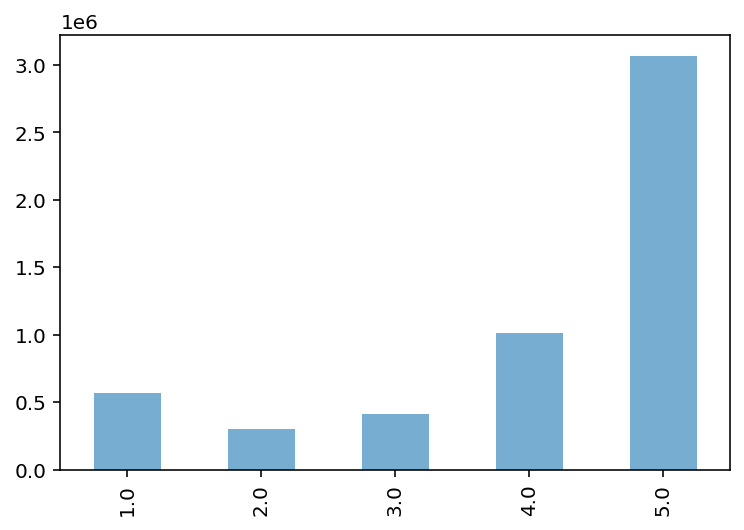

In [12]:
#Now back to the histogram
print ("generating the histogram")
data.rating.value_counts().sort_index().plot.bar(alpha=0.6);

In [13]:
#checking the percentual by rating on the dataset
print ("Generating percentuals:")
(data.rating.value_counts().sort_index() / len(data.rating)).map(lambda n: '{:.2%}'.format(n))

Generating percentuals:


1.0    10.64%
2.0     5.57%
3.0     7.73%
4.0    18.93%
5.0    57.13%
Name: rating, dtype: object

### 10 Popular Products

In [14]:
popular_products = data.groupby(['item']).agg({'rating': 'sum'}).reset_index()
popular_products = popular_products.sort_values(['rating', 'item'], ascending = [0,1]).head(10)

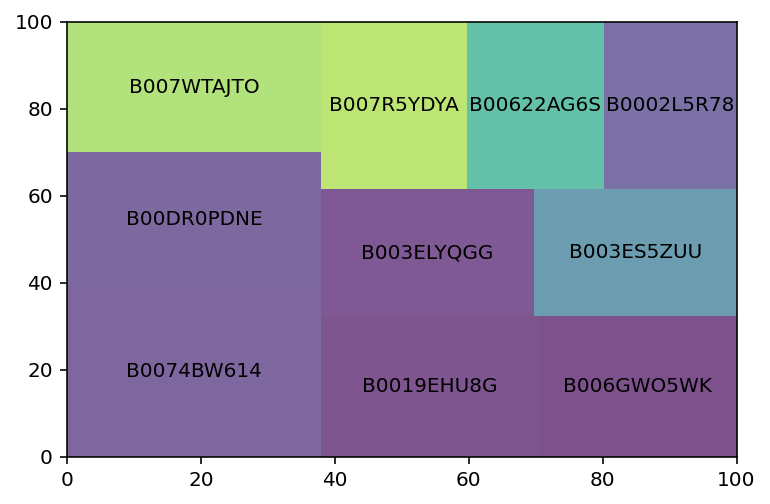

<Figure size 1440x1080 with 0 Axes>

In [15]:
volume = popular_products.rating
labels = popular_products.item

squarify.plot(sizes=volume, label=labels,
              alpha=0.7)

plt.figure(figsize=(20, 15))

plt.show()

In [16]:
popular_products['percentage'] = popular_products['rating'].div(popular_products['rating'].sum())*100
popular_products = popular_products.sort_values(['rating', 'item'], ascending = [0,1]).head(10)

In [17]:
popular_products

,item,rating,percentage
19245,B0074BW614,81943.0,14.846064
25032,B00DR0PDNE,64681.0,11.718613
20325,B007WTAJTO,62697.0,11.359161
6593,B0019EHU8G,58409.0,10.582280
18581,B006GWO5WK,52751.0,9.557189
11856,B003ELYQGG,51028.0,9.245024
11875,B003ES5ZUU,48346.0,8.759111
20101,B007R5YDYA,46473.0,8.419769
18241,B00622AG6S,43419.0,7.866459
1751,B0002L5R78,42204.0,7.646331


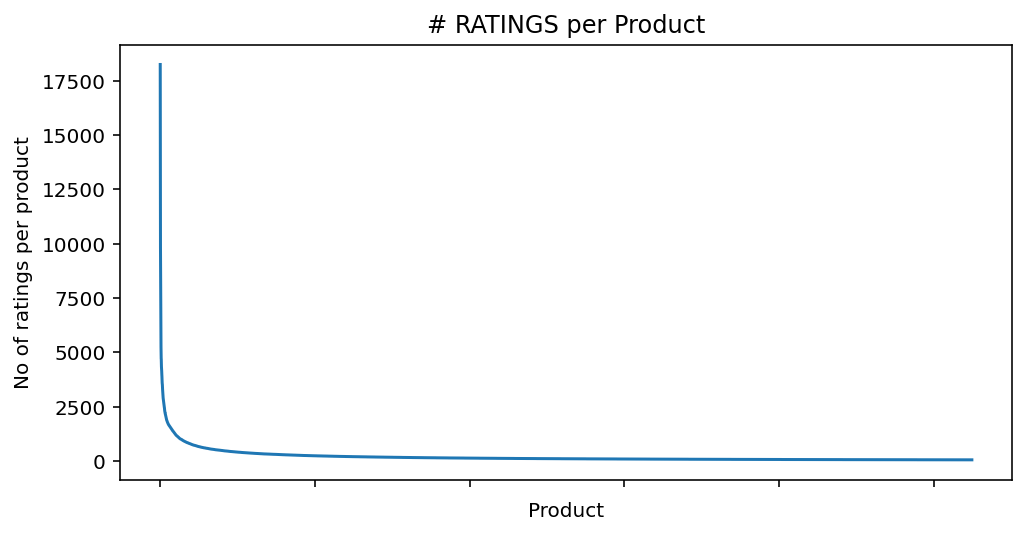

In [18]:
no_of_ratings_per_product = data.groupby(by='item')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

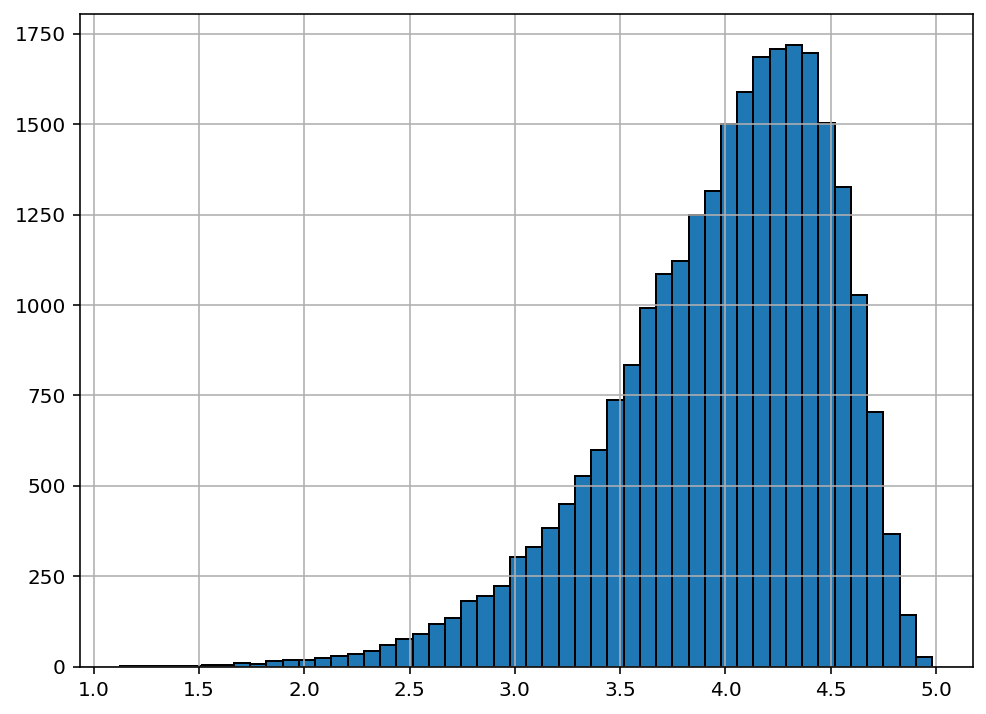

In [19]:
ratings_mean_count = pd.DataFrame(data.groupby('item')['rating'].mean())

ratings_mean_count['rating_counts'] = pd.DataFrame(data.groupby('item')['rating'].count())

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50);

<Figure size 576x432 with 0 Axes>

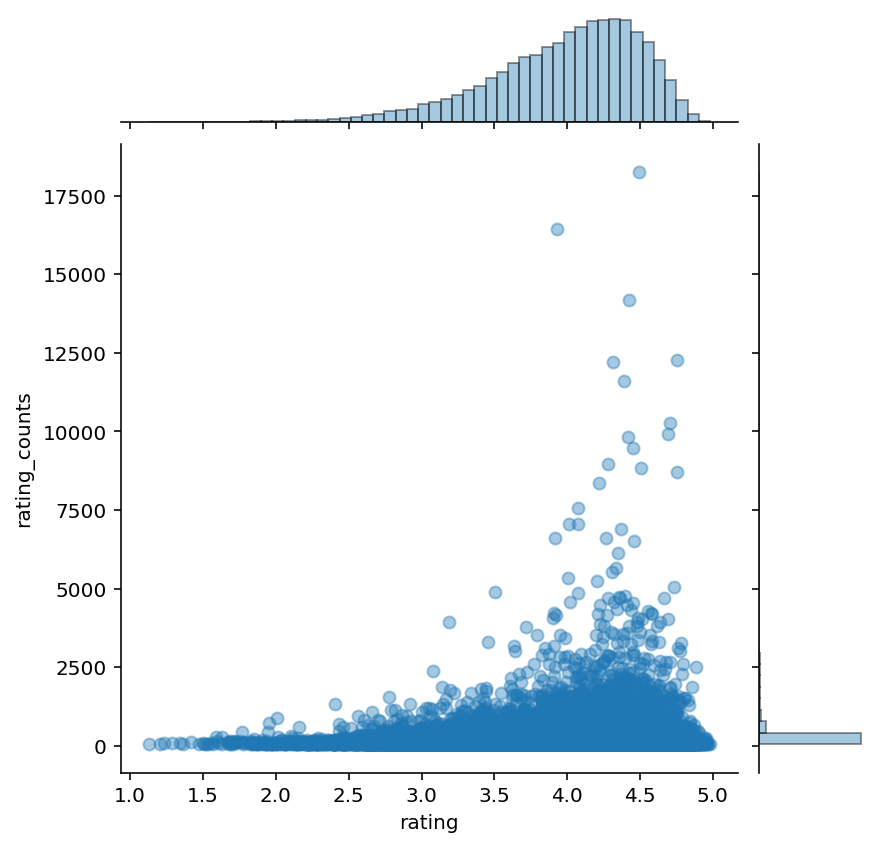

In [20]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

## Recommending

In [21]:
# Splitting the data
from sklearn.model_selection import train_test_split

# Splitinto training and testing sets
X_train, X_test = train_test_split(data, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# recommended_popularity = X_train.groupby(['song']).agg({'listen_count': 'count'}).reset_index()
# train_popular_songs = recommended_popularity.sort_values(['listen_count', 'song'], ascending = [0,1]).head(10)

## Collaberative filtering (Item-Item recommedation

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In [22]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [23]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
newData = Dataset.load_from_df(data[['user', 'item', 'rating']] ,reader)

In [24]:
#Splitting the dataset
trainset, testset = train_test_split(newData, test_size=0.2,random_state=10)

In [25]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [26]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [27]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.3345


1.3345287465693558

## Model-based collaborative filtering system

These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [28]:
subset = data.head(200000)

ratings_matrix = subset.pivot_table(values='rating', index='user', columns='item', fill_value=0)
ratings_matrix.head()

item,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B0000APONO,B0000AQI9E,B0000AQIFW,B0000AQIFY,B0000AQIFZ,B0000AQNX2,B0000AQR8F,B0000AR8Z1,B0000ATNH3,B0000AZ0OP
user,,,,,,,,,,,,,,,,,,,,,
A00124802J36AVPT3779A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00570163ATHRHPDG3GKN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00625243BI8W1SSZNLMD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0072193KFP6LUHKEXLT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00988692Q9ZDJUD8BQSM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
ratings_matrix.shape

(178279, 1144)

In [30]:
X = ratings_matrix.T
X.head()

user,A00124802J36AVPT3779A,A00570163ATHRHPDG3GKN,A00625243BI8W1SSZNLMD,A0072193KFP6LUHKEXLT,A00988692Q9ZDJUD8BQSM,A00995931BE16NG4F52QC,A01035471LBTPFWCOKAU2,A014623426J5CM7M12MBW,A01771021FA6LVUILJVPD,A01817022GAUTPHMU63NJ,...,AZZP8BC9WE0N8,AZZQFCVCFE8HL,AZZSCU0QYNQQ6,AZZST8OYL5P4Q,AZZUBI2MEAHI9,AZZUDVKC0E2XU,AZZUQYE2C1LNI,AZZX23UGJGKTT,AZZYWDOD33FFE,AZZZEWADNFNUM
item,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(1144, 10)

In [33]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(1144, 1144)

In [38]:
X.index[80]

'B00000K4KH'

In [39]:
#Index # of product ID purchased by customer

i = "B00000K4KH"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

80

In [40]:
#Correlation for all items with the item purchased by this customer based on 
#items rated by other customers people who bought the same product

correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(1144,)

In [42]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:24]

['B000001OM4',
 'B00000J061',
 'B00000JSGF',
 'B00000JYLO',
 'B00000K2YR',
 'B00001P4XH',
 'B00001P4ZH',
 'B00001P505',
 'B00001W0DD',
 'B00002CEX9',
 'B00004LMEC',
 'B00004SB99',
 'B00004SY4H',
 'B00004TEN2',
 'B00004UE2R',
 'B00004VUGJ',
 'B00004XO1V',
 'B00004YBVE',
 'B00004Z0BO',
 'B00004Z6KW',
 'B00004Z6Q6',
 'B00004Z7G9',
 'B000051SD1',
 'B000051WW9']